## Import Libraries & Data Overview

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import sklearn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving boston.xlsx to boston.xlsx


In [ ]:
df = pd.read_excel('boston.xlsx')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:

X =  df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

#"target" is the response variable
y = df['MEDV']

In [ ]:
X['target'] = y

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


## Exploratory Data Analysis

### Correlation Matrix

Prevent collinearity by removing linearly dependent variables.

For example, if 2 variables A and B have a correlation coefficient larger than 0.9, eliminate one to avoid redundency.

In [ ]:
new_df = df.copy()
new_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
correlation_matrix = new_df.corr().abs()
correlation_matrix.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,0.200469,0.406583,0.055892,0.420972,0.219247,0.352734,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305
ZN,0.200469,1.000000,0.533828,0.042697,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995,0.360445
INDUS,0.406583,0.533828,1.000000,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800,0.483725
CHAS,0.055892,0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,0.099176,0.007368,0.035587,0.121515,0.048788,0.053929,0.175260
NOX,0.420972,0.516604,0.763651,0.091203,1.000000,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321


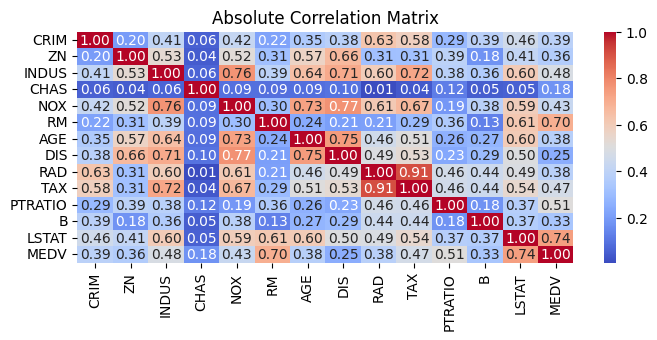

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Absolute Correlation Matrix")
plt.show()

In [ ]:
# Calculate the correlation matrix for new_df
correlation_matrix = new_df.corr().abs()

# Set the threshold for high correlation
threshold = 0.7

# Create a mask for the upper triangle
mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)

# Find highly correlated features
highly_correlated = [(new_df.columns[i], new_df.columns[j])
                     for i in range(correlation_matrix.shape[0])
                     for j in range(i+1, correlation_matrix.shape[1])
                     if correlation_matrix.iloc[i, j] > threshold]

# Remove one variable from each highly correlated pair in new_df
for var1, var2 in highly_correlated:
    # Remove the variable with higher index
    if var1 in new_df.columns:
        new_df.drop(var1, axis=1, inplace=True)
    elif var2 in new_df.columns:
        new_df.drop(var2, axis=1, inplace=True)

# Display the resulting DataFrame after removing collinearity
print(new_df)



        CRIM    ZN  CHAS     RM  PTRATIO       B  MEDV
0    0.00632  18.0     0  6.575     15.3  396.90  24.0
1    0.02731   0.0     0  6.421     17.8  396.90  21.6
2    0.02729   0.0     0  7.185     17.8  392.83  34.7
3    0.03237   0.0     0  6.998     18.7  394.63  33.4
4    0.06905   0.0     0  7.147     18.7  396.90  36.2
..       ...   ...   ...    ...      ...     ...   ...
501  0.06263   0.0     0  6.593     21.0  391.99  22.4
502  0.04527   0.0     0  6.120     21.0  396.90  20.6
503  0.06076   0.0     0  6.976     21.0  396.90  23.9
504  0.10959   0.0     0  6.794     21.0  393.45  22.0
505  0.04741   0.0     0  6.030     21.0  396.90  11.9

[506 rows x 7 columns]


In [ ]:
new_df

,CRIM,ZN,CHAS,RM,PTRATIO,B,MEDV
0,0.00632,18.0,0,6.575,15.3,396.90,24.0
1,0.02731,0.0,0,6.421,17.8,396.90,21.6
2,0.02729,0.0,0,7.185,17.8,392.83,34.7
3,0.03237,0.0,0,6.998,18.7,394.63,33.4
4,0.06905,0.0,0,7.147,18.7,396.90,36.2
...,...,...,...,...,...,...,...
501,0.06263,0.0,0,6.593,21.0,391.99,22.4
502,0.04527,0.0,0,6.120,21.0,396.90,20.6
503,0.06076,0.0,0,6.976,21.0,396.90,23.9
504,0.10959,0.0,0,6.794,21.0,393.45,22.0


In [ ]:
new_df.columns

Index(['CRIM', 'ZN', 'CHAS', 'RM', 'PTRATIO', 'B', 'MEDV'], dtype='object')

## Data Preparation

###  Data Partition

Partition the data into 75% training and 25% validation set.

In [ ]:
X = new_df[['CRIM', 'ZN', 'CHAS', 'RM', 'PTRATIO', 'B']]
y = new_df[['MEDV']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)



## Model Building

### Linear Regression Model

If we fit a linear regression model on the training set, what will be the feature weights?

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the feature weights (coefficients)
feature_weights = model.coef_
feature_weights


array([[-0.15511273,  0.00998358,  3.35529872,  7.52118122, -0.85892036,
         0.01893171]])

### Linear Regression with Two Predictors

Now only consider two input variables: Age and RM.

Fit a linear regression model on the training set with a package at your choice.

Present the model summary. We call this model **Model 1**.

In [ ]:
X1 = df[['RM', 'AGE']]
Y1 = df[['MEDV']]

In [ ]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size=0.25,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X1_train,Y1_train)

LinearRegression()

In [ ]:
Y_pred1 = reg.predict(X1_test)
from sklearn.metrics import r2_score
r2_score(Y1_test,Y_pred1)

0.4700512007574823

### Model 1 Performance Evaluation

Evaluate the prediction performance of Model 1 on the validation set with RMSE and MAE as performance metrics.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE and MAE
rmse1 = np.sqrt(mean_squared_error(Y1_test, Y_pred1))
mae1 = mean_absolute_error(Y1_test, Y_pred1)
print(rmse1)
print(mae1)

6.091863482873927
3.923973303623645


###  Linear Regression with All Predictors

Now consider all the features (after removing linearly dependent variables).

Fit a linear regression model on the training set with a package at your choice. Present the model summary.

We call this model **Model 2**.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

### Model 2 Performance Evaluation

Evaluate the prediction performance of Model 2 on the validation set with RMSE and MAE as performance metrics.

In [ ]:
Y_pred = reg.predict(X_valid)
from sklearn.metrics import r2_score
r2_score(y_valid,Y_pred)

0.5439433069184092

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_valid, Y_pred))
mae = mean_absolute_error(y_valid, Y_pred)
print(rmse)
print(mae)


5.651225315002382
3.4594195722792094


###  Model Performance Comparison

Compare the performance of Model 1 and Model 2.

Visualize the prediction error of both models using histogram.

Comment on the model fitting.

In [ ]:
# Calculate prediction errors for both models
error_model1 = y_valid - Y_pred
error_model2 = y_valid - Y_pred1

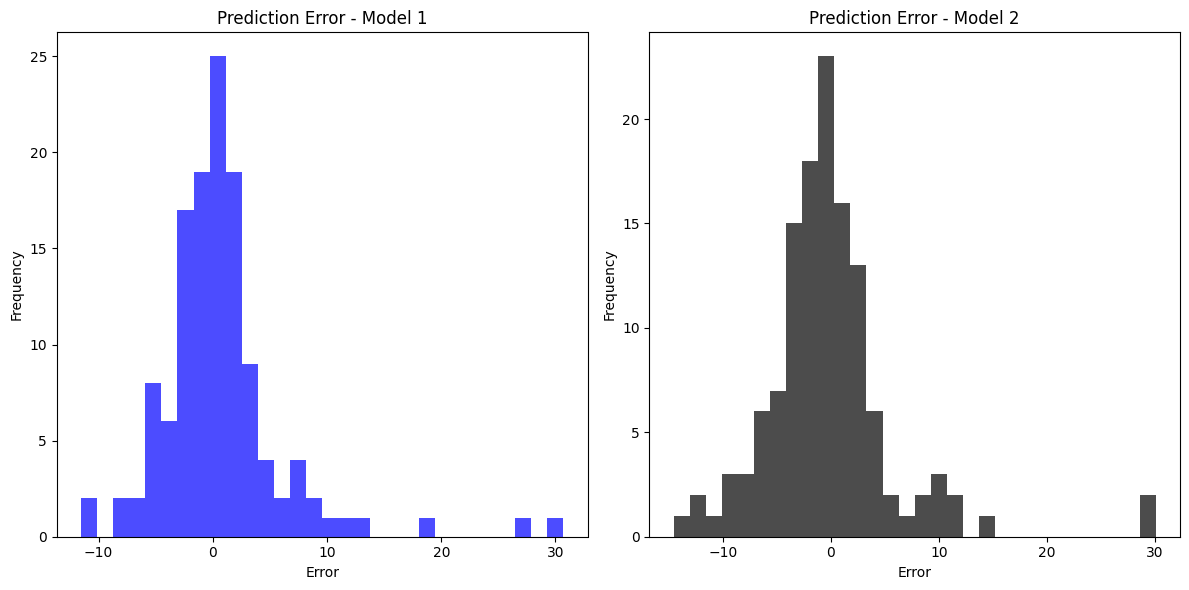

In [ ]:
import matplotlib.pyplot as plt

# Create histograms to visualize the prediction errors
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(error_model1, bins=30, color='blue', alpha=0.7)
plt.title("Prediction Error - Model 1")
plt.xlabel("Error")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(error_model2, bins=30, color='black', alpha=0.7)
plt.title("Prediction Error - Model 2")
plt.xlabel("Error")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import Ridge
import numpy as np


# Create and fit the Ridge regression model
alpha = 1.0
model3 = Ridge(alpha=alpha)
model3.fit(X_train, y_train)

# Predict on the training set
Y_pred2 = model3.predict(X_valid)

# Calculate RMSE for Model 3
rmse_model3 = np.sqrt(mean_squared_error(y_valid, Y_pred2))
r2_model3 = r2_score(y_valid, Y_pred2)

# Print the model summary with the selected lambda (alpha)
print("Ridge Regression Model (Model 3) - Summary")
print("Lambda (Alpha):", alpha)
print("RMSE on Training Set:", rmse_model3)
print("r2-score on Training Set:", r2_model3)


Ridge Regression Model (Model 3) - Summary
Lambda (Alpha): 1.0
RMSE on Training Set: 5.6452331642599765
r2-score on Training Set: 0.544909933265433


### Model 3 Performance Evaluation

Evaluate the prediction performance of Model 3 on the validation set with RMSE and MAE as performance metrics.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE for Model 3
rmse_model3 = np.sqrt(mean_squared_error(y_valid, Y_pred2))

# Calculate MAE for Model 3
mae_model3 = mean_absolute_error(y_valid, Y_pred2)

# Print RMSE and MAE for Model 3
print("RMSE for Model 3:", rmse_model3)
print("MAE for Model 3:", mae_model3)


RMSE for Model 3: 5.6452331642599765
MAE for Model 3: 3.457045860733767


## Model Selection

### Model Comparison & Selection



Model 3 achive a low bias low variance model, hence Model3 is much preferable. Model3 and model 2 are giving approximately same results. But Model3 uses ridge regression which reduces overfitting,
enabling us to